In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import networkx as nx


#### PROBLEM.1

In [2]:
# Function to draw the graph
def draw_colored_graph_straight_line(states, adjacency_matrix, title="", file=None):
    G = nx.Graph()
    n_nodes = len(states)
    
    for i in range(n_nodes):
        G.add_node(i, color='red' if states[i] == 0 else 'green')
    
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            if adjacency_matrix[i, j] > 0:
                G.add_edge(i, j)
    
    node_colors = [G.nodes[node]['color'] for node in G.nodes]
    pos = {i: (i, 0) for i in range(n_nodes)}
    
    plt.figure(figsize=(8, 2))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')
    plt.title(title)
    if file is not None:
        plt.savefig(title + '.jpg')
    plt.show()


In [3]:
# Number of nodes in the line graph
num_nodes = 10
num_iterations = 200

# Define colors: 0 = Red, 1 = Green
colors = [0, 1]

# Initialize all nodes to Red (0)
states = np.zeros(num_nodes, dtype=int)

# Adjacency matrix for a line graph
W = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes - 1):
    W[i, i + 1] = 1
    W[i + 1, i] = 1


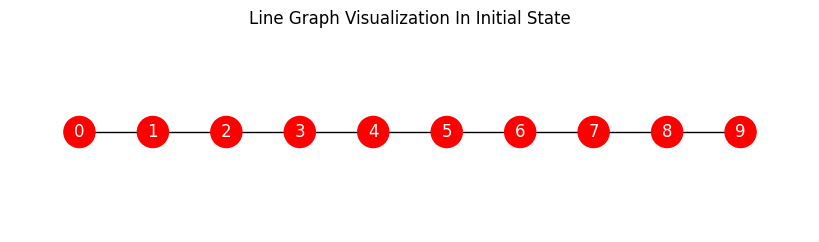

In [4]:
# Draw the initial state of the graph
title = "Line Graph Visualization In Initial State"
draw_colored_graph_straight_line(states, W, title=title, file=1)


In [5]:
# Cost function
def cost(s, Xj):
    return int(s == Xj)

In [6]:
# Potential function
def potential(X):
    return 0.5 * sum(W[i, j] * cost(X[i], X[j]) for i in range(num_nodes) for j in range(num_nodes) if W[i, j] == 1)


In [7]:
# Run the simulation
potential_values = []
for t in range(1, num_iterations + 1):
    eta_t = t / 50  # Inverse noise function
    i = np.random.randint(0, num_nodes)  # Random node selection
    
    # Compute probability for each color
    exp_values = np.array([np.exp(-eta_t * sum(W[i, j] * cost(c, states[j]) for j in range(num_nodes))) for c in colors])
    probabilities = exp_values / np.sum(exp_values)
    
    # Update color
    states[i] = np.random.choice(colors, p=probabilities)
    
    # Store potential function value
    potential_values.append(potential(states))


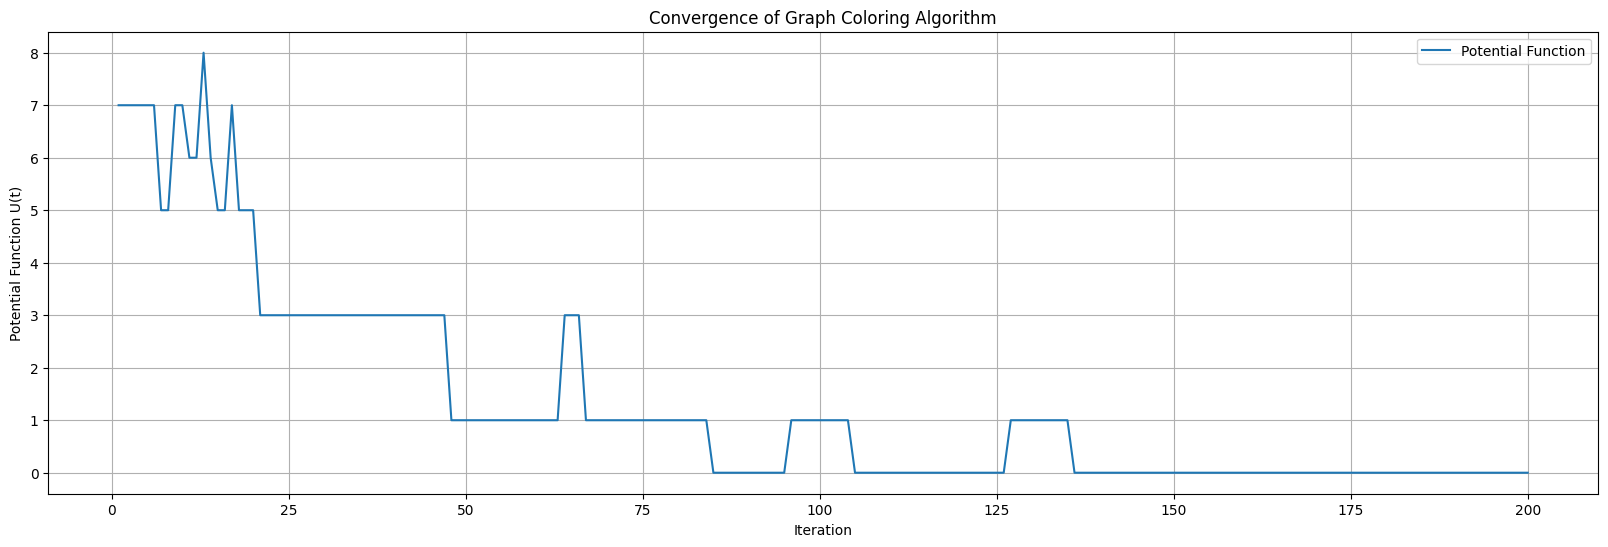

In [10]:
# Plot the potential function over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_iterations + 1), potential_values, label='Potential Function')
plt.xlabel('Iteration')
plt.ylabel('Potential Function U(t)')
plt.title('Convergence of Graph Coloring Algorithm')
plt.legend()
plt.grid()
plt.savefig("2_a_Potential Function Over Time.jpg")
plt.show()


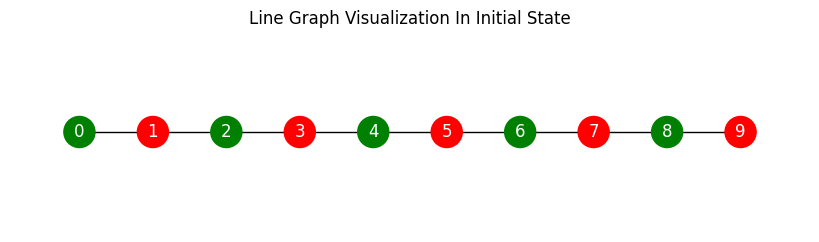

In [9]:

title = "Line Graph Visualization In Initial State"
draw_colored_graph_straight_line(states, W, title=title, file=1)


#### PROBLEM.2

In [12]:
# Load adjacency matrix and coordinates
W = loadmat("wifi.mat")["wifi"]
coords = loadmat("coords.mat")["coords"]


# Parameters
n_nodes = W.shape[0]  # Number of routers
C = list(range(1, 9))  # Channel set (1 to 8)

T = 1000  # Number of iterations
colors = {
    1 : 'red',
    2 : 'green',
    3 : 'blue',
    4 : 'yellow',
    5 : 'magenta',
    6 : 'cyan',
    7 : 'gray',
    8 : 'black',
}

In [13]:
def noise(t):
    return t / 50

In [14]:
def cost(s, neighbor_state):
    if s == neighbor_state:
        return 2  # Severe interference
    elif abs(s - neighbor_state) == 1:
        return 1  # Mild interference
    return 0  # No interference


In [ ]:
def update_probabilities(node, states, t):
    probs = []
    for color in C:
        total_cost = sum(W[node, j] * cost(color, states[j]) for j in range(n_nodes))
        probs.append(np.exp(-noise(t) * total_cost))
    probs = np.array(probs) / sum(probs)  # Normalize probabilities
    return probs

In [16]:
def compute_potential(states):
    U = 0
    for i in range(n_nodes):
        for j in range(n_nodes):
            if W[i, j] > 0:
                U += cost(states[i], states[j])
    return U / 2  # Avoid double-counting


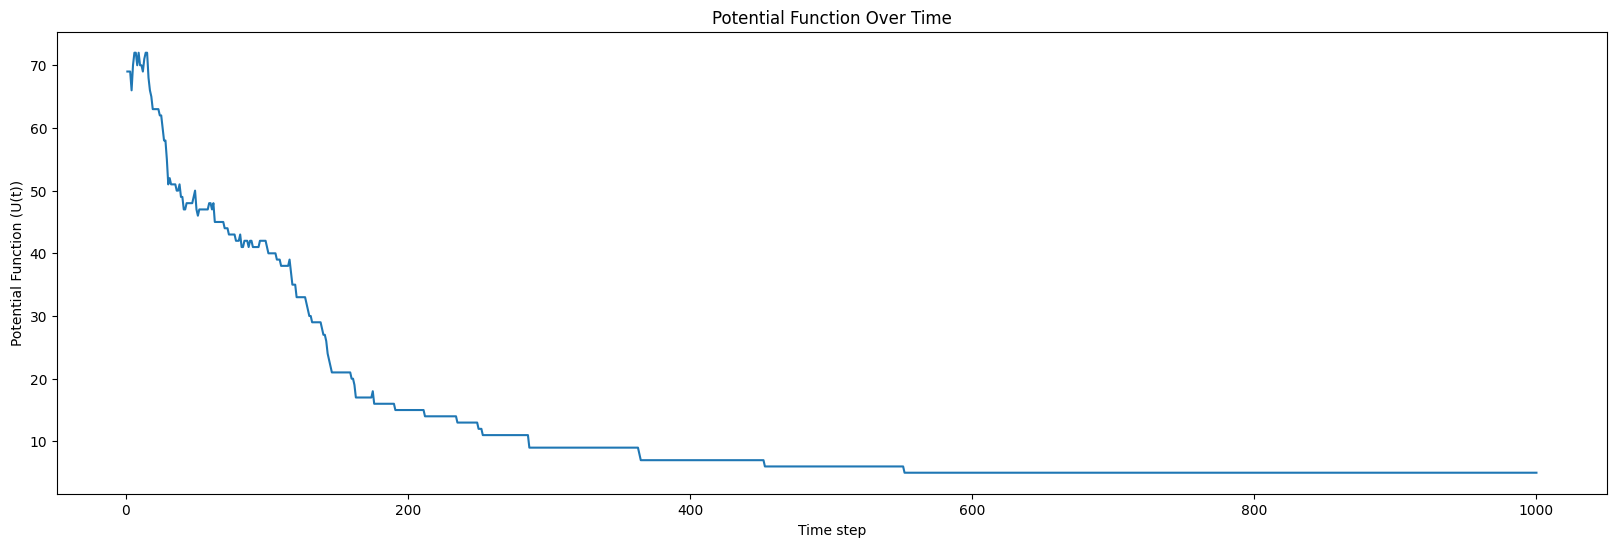

In [21]:

# Simulation
states = np.random.choice(C, size=n_nodes)  # Random initial channels
potential = []

for t in range(1, T + 1):
    node = np.random.randint(n_nodes)  # Random router
    probs = update_probabilities(node, states, t)
    new_color = np.random.choice(C, p=probs)  # Sample new channel
    states[node] = new_color
    potential.append(compute_potential(states))

# Plot potential function
plt.figure(figsize=(20, 6))
plt.plot(range(1, T + 1), potential)
plt.xlabel("Time step")
plt.ylabel("Potential Function (U(t))")
plt.title("Potential Function Over Time")
plt.savefig("2_b_Potential Function.jpg")
plt.show()



C:\Users\taha_kms\AppData\Local\Temp\ipykernel_14612\1786136446.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', len(C)),  # Use a categorical colormap
c:\Users\taha_kms\AppData\Local\Programs\Python\Python39\lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


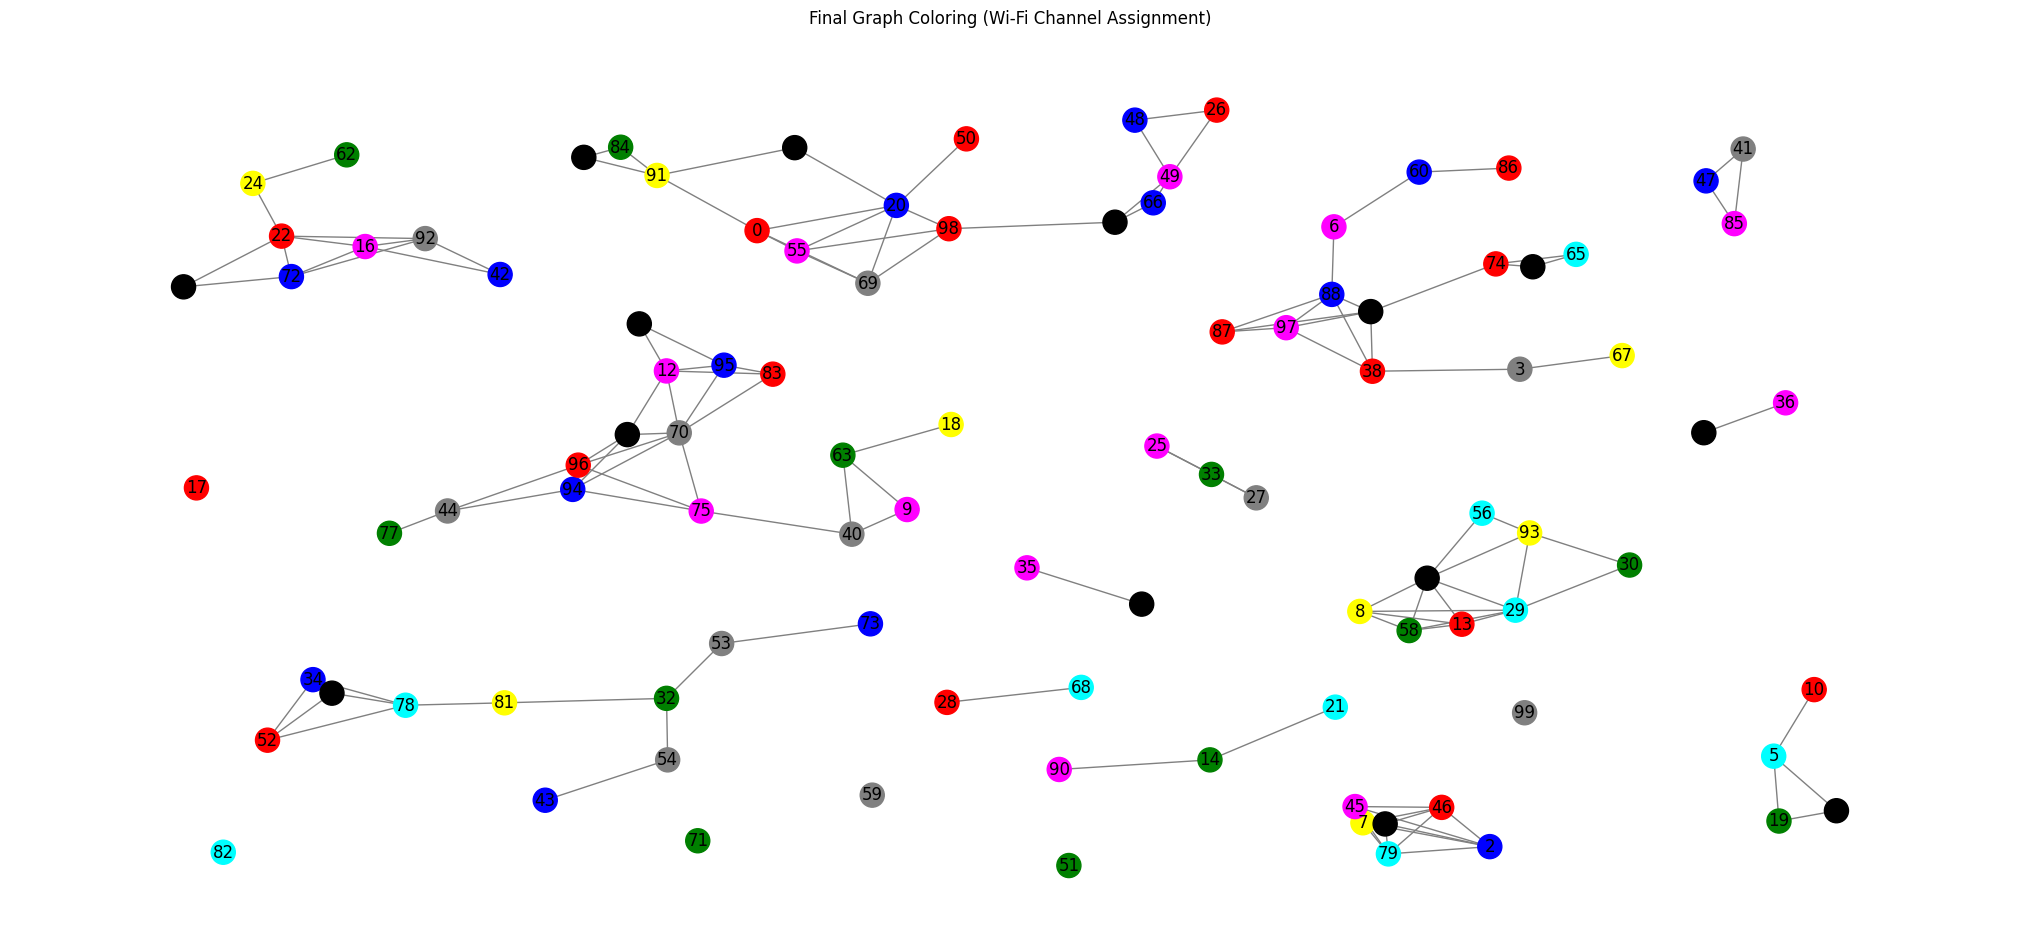

In [22]:

# Visualize final graph with colors
G = nx.Graph()

# Add nodes with positions and colors
for i in range(n_nodes):
    G.add_node(i, pos=(coords[i, 0], coords[i, 1]))

# Add edges based on adjacency matrix
for i in range(n_nodes):
    for j in range(n_nodes):
        if W[i, j] > 0:
            G.add_edge(i, j)

# Get positions and colors for visualization
positions = nx.get_node_attributes(G, 'pos')
node_colors = [colors[states[i]] for i in range(n_nodes)]  # Final colors

# Draw the graph
plt.figure(figsize=(20, 9))
nx.draw(
    G,
    pos=positions,
    node_color=node_colors,
    cmap=plt.cm.get_cmap('tab10', len(C)),  # Use a categorical colormap
    with_labels=True,
    node_size=300,
    edge_color="gray"
)
plt.title("Final Graph Coloring (Wi-Fi Channel Assignment)")
plt.savefig("2_b_Final Graph Coloring.jpg")
plt.show()